In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

#### Define a function that represents the true target variable mapping function

In [32]:
def true_fun(val):
    return np.cos(1.5 * np.pi * val)

#### Generate a list of evenly spaced numbers between 0 and 1 represent the values for a single feature variable in a test dataset

In [33]:
X_test = np.linspace(0, 1, 100)
print (X_test)

[0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.7979798  0.80808081 0.81818182 0.82828283 0.83838384
 0.84848485 0.85858586 0.86868687 0.87878788 0.88888889 0.89898

#### Plot the true / correct target variable values based on the true function for all these feature variable values

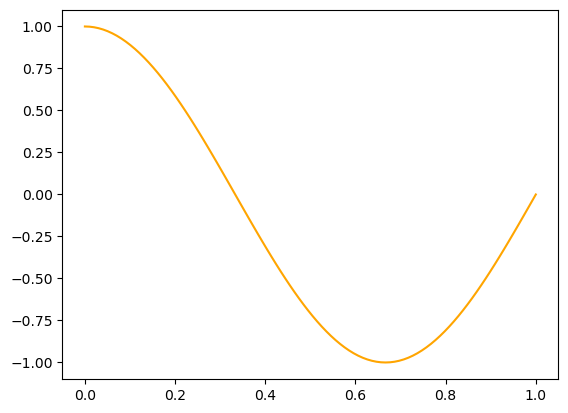

In [34]:
plt.plot(X_test, true_fun(X_test), color = "orange", label="True function")


### Generate 30 random feature variable values between 0 and 1

In [35]:
np.random.seed(0)

n_samples = 30
X = np.sort(np.random.rand(n_samples))
print (X)

[0.0202184  0.07103606 0.0871293  0.11827443 0.14335329 0.38344152
 0.41466194 0.4236548  0.43758721 0.46147936 0.52184832 0.52889492
 0.54488318 0.5488135  0.56804456 0.60276338 0.63992102 0.64589411
 0.71518937 0.77815675 0.78052918 0.79172504 0.79915856 0.83261985
 0.87001215 0.891773   0.92559664 0.94466892 0.96366276 0.97861834]


#### Simulate noise to obtain a more realistic target variable value corresponding to these feature variable values by adding in some random numbers to the actual correct values

Text(0, 0.5, 'y : Target variable')

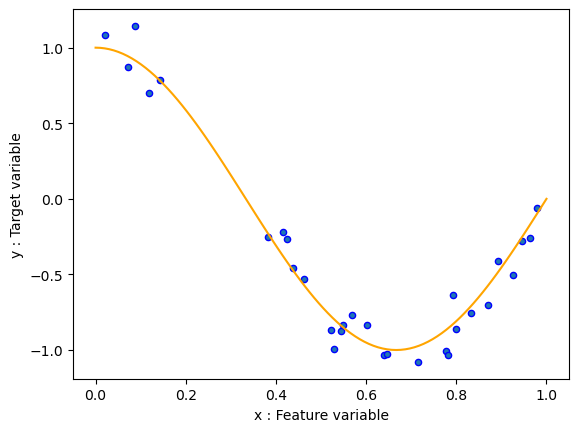

In [36]:
y = true_fun(X) + np.random.randn(n_samples) * 0.1
plt.plot(X_test, true_fun(X_test), color = "orange", label="True function")
plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
plt.xlabel("x : Feature variable")
plt.ylabel("y : Target variable")

### Define function for plotting polynomial features of different degrees

In [37]:
def plot_degrees(degrees):
    plt.figure(figsize=(14, 5))
    for i in range(len(degrees)):
        ax = plt.subplot(1, len(degrees), i + 1)
        plt.setp(ax, xticks=(), yticks=())

        polynomial_features = PolynomialFeatures(degree=degrees[i], 
                                                 include_bias=False)
        linear_regression = LinearRegression()
        pipeline = Pipeline(
            [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
            ]
        )
        pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
        scores = cross_val_score(
            pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10
        )

        #X_test = np.linspace(0, 1, 100)
        plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
        plt.plot(X_test, true_fun(X_test), label="True function")
        plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
        plt.xlabel("x : Feature variable")
        plt.ylabel("y : Target variable")
        plt.xlim((0, 1))
        plt.ylim((-2, 2))
        plt.legend(loc="best")
        plt.title(
        "Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
            degrees[i], -scores.mean(), scores.std()
        )
        )
    plt.show()
  
    

#### At the lower degrees, it is clearly underfit but with low variance

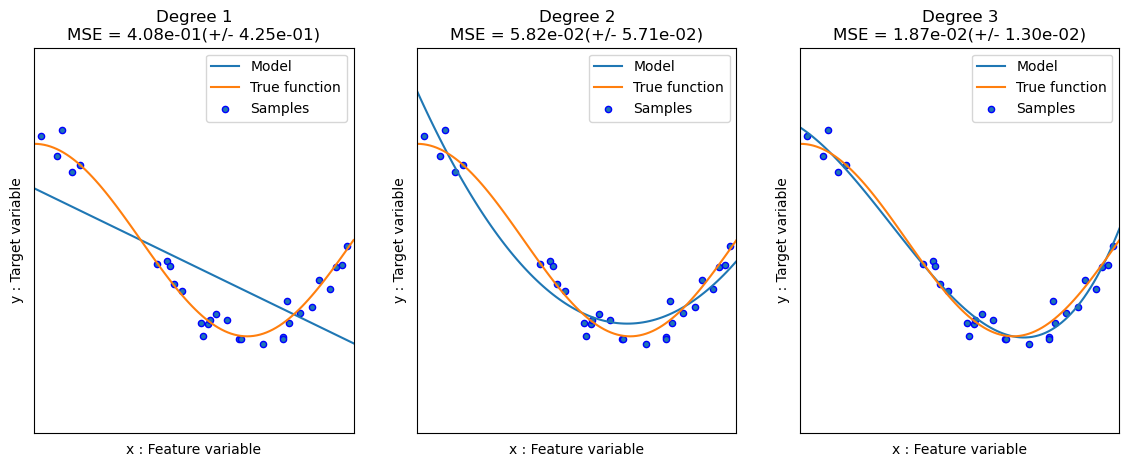

In [38]:
plot_degrees([1,2,3])

#### Roughly around 4 degrees, we have the best fit -> lowest MSE

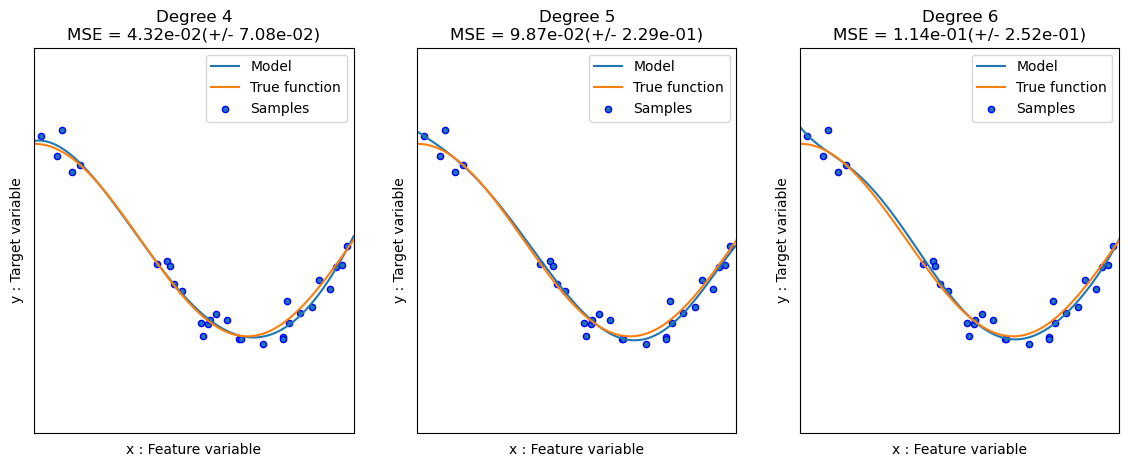

In [39]:
plot_degrees([4,5,6])

### At 11, 12, 13 it is clearly overfitting and the variance is increasing

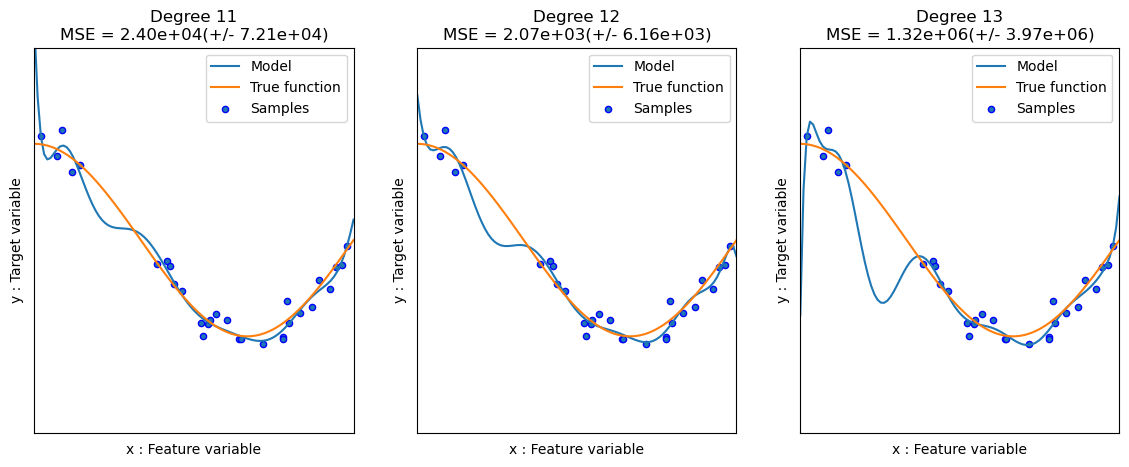

In [40]:
plot_degrees([11,12,13])

#### At 18,19,20 it is super overfitted with out of the world variance !

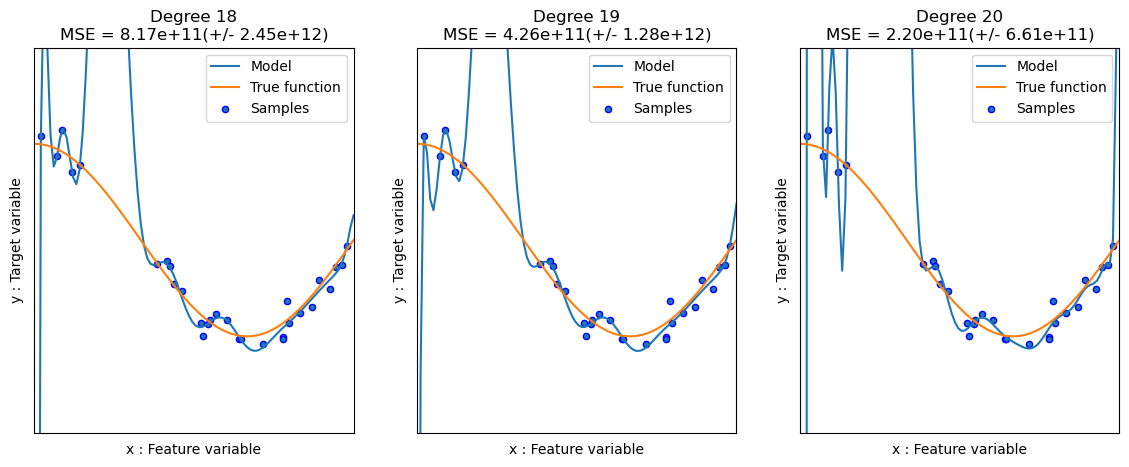

In [41]:
plot_degrees([18,19,20])